In [1]:
import pandas as pd
import sqlite3
con = sqlite3.connect('final.sqlite')
final = pd.read_sql_query('select * from Reviews',con)
final.shape
con.close()

import gc
import pickle

gc.collect()

file = open('pickles/tfidf_w2v.pkl','rb')
w2v = pickle.load(file)

In [2]:
final['Score'].value_counts()

positive    306814
negative     57083
Name: Score, dtype: int64

In [3]:
import numpy as np
np.where(np.isnan(w2v))
w2v[192522] = np.zeros(50)
w2v[227624] = np.zeros(50)
w2v[356108] = np.zeros(50)
np.where(np.isnan(w2v))

(array([], dtype=int64), array([], dtype=int64))

In [11]:
#print(bigram_bow_ds.shape)
from sklearn.model_selection import train_test_split

x_train , x_test , y_train, y_test = train_test_split(w2v,final['Score'].values,test_size=0.2, random_state=0)

#print("Test",x_test.shape,y_test.shape)
#print("Training ", x_train.shape,y_train.shape)
#print("Cross Validation ", x_cv.shape,y_cv.shape)

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()

fit_obj = gnb.fit(x_train,y_train)
print("Fit Completed")

y_train_predicted = fit_obj.predict(x_train)
train_accuracy = metrics.accuracy_score(y_train_predicted,y_train)
print("Train Accuracy", train_accuracy)

y_test_predicted = fit_obj.predict(x_test)
test_accuracy = metrics.accuracy_score(y_test_predicted,y_test)
print("Test Accuracy", test_accuracy)

Fit Completed
Train Accuracy 0.825884438216
Test Accuracy 0.826985435559


In [29]:
print("Test: ....", final['CleanedText'][30000],final['Score'][30000])
fit_obj.predict(w2v[30000:30001])
#w2v[100:102]

Test: .... my dog cora a lb boxer mix loves any and all treat toys i recently broke down and bought one of these toys and she loves it as well ive limited her to one treat every two weeks since they are not cheap and i dont know the caloric density of these treats and like to keep her weight well regulated in the between times i place treats kibble inside the ball and she flings it around the apartment to get them out ive had to take the everlasting treat ball away from her on occasion because she will not stop eating the treat and starts to get frustrated that she cant get it out she has popped out the treats occasionally but only after several hours of chewing and licking it beforehand its nice to have something i can give her that will keep her occupied make sure you get the right size otherwise it will be more likely that your dog can pop the treats out i bought cora a large put the treats in this trick was mentioned by someone else who commented and it definitely works for my dog 

array(['positive'],
      dtype='<U8')

In [9]:
gc.collect()

file = open('pickles/bow_bigram.pkl','rb')
bow = pickle.load(file)


In [10]:
from sklearn.model_selection import train_test_split

x_1 , x_test , y_1, y_test = train_test_split(bow,final['Score'].values,test_size=0.2, random_state=0)
x_train , x_cv , y_train, y_cv = train_test_split(x_1,y_1,test_size=0.2, random_state=0)

In [27]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn import metrics

hyper_parameter = [0.001,0.01,0.1,1,10,100,1000]
metric_data = []
for alpha in hyper_parameter:
    bn = MultinomialNB(alpha=alpha)
    bn.fit(x_train,y_train)
    y_predicted = bn.predict(x_cv)
    accuracy = metrics.accuracy_score(y_cv,y_predicted,normalize=True)*float(100)
    print("CV Accuracy for alpha = %f is %d%%" %(alpha,accuracy))
    TN , FN , FP , TP = metrics.confusion_matrix(y_cv,y_predicted).ravel()
    print("TN = %d FN =%d FP = %d TP = %d \n ********* \n" %(TN,FN,FP,TP))
    error = 100-accuracy
    temp = (alpha,accuracy,error)
    metric_data.append(temp)
    
print(len(metric_data))

CV Accuracy for alpha = 0.001000 is 91%
TN = 6131 FN =2852 FP = 1812 TP = 47429 
 ********* 

CV Accuracy for alpha = 0.010000 is 92%
TN = 7045 FN =1938 FP = 2665 TP = 46576 
 ********* 

CV Accuracy for alpha = 0.100000 is 91%
TN = 7698 FN =1285 FP = 3710 TP = 45531 
 ********* 

CV Accuracy for alpha = 1.000000 is 90%
TN = 4195 FN =4788 FP = 640 TP = 48601 
 ********* 

CV Accuracy for alpha = 10.000000 is 84%
TN = 1 FN =8982 FP = 11 TP = 49230 
 ********* 

CV Accuracy for alpha = 100.000000 is 84%
TN = 0 FN =8983 FP = 0 TP = 49241 
 ********* 

CV Accuracy for alpha = 1000.000000 is 84%
TN = 0 FN =8983 FP = 0 TP = 49241 
 ********* 

7


In [29]:
import matplotlib.pyplot  as plt

metric_data

[(0.001, 91.989557570761193, 8.0104424292388074),
 (0.01, 92.094325364111015, 7.9056746358889853),
 (0.1, 91.421063478977743, 8.578936521022257),
 (1, 90.677383896674911, 9.3226161033250889),
 (10, 84.55447925254191, 15.44552074745809),
 (100, 84.571654300632034, 15.428345699367966),
 (1000, 84.571654300632034, 15.428345699367966)]

Consider the alpha = 0.01 as it has low error.

In [30]:
bn = MultinomialNB(alpha=0.01)
bn.fit(x_train,y_train)
y_predicted = bn.predict(x_cv)
accuracy = metrics.accuracy_score(y_cv,y_predicted,normalize=True)*float(100)
print("CV Accuracy for alpha = %f is %d%%" %(0.01,accuracy))
confusion = metrics.confusion_matrix(y_cv,y_predicted)
#print("TN = %d FN =%d FP = %d TP = %d \n ********* \n" %(TN,FN,FP,TP))

CV Accuracy for alpha = 0.010000 is 92%


[[ 7045  1938]
 [ 2665 46576]]


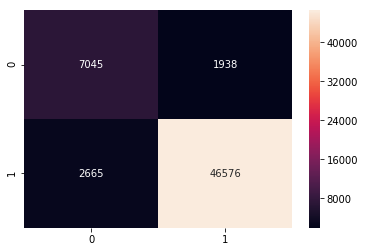

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
print(confusion)
sns.heatmap(confusion,annot=True,fmt='d')
plt.show()

In [32]:
bn.class_log_prior_

array([-1.84995727, -0.17107767])

In [33]:
bn.feature_log_prob_

array([[-13.25216966, -20.16092444, -15.54580392, ..., -20.16092444,
        -20.16092444, -20.16092444],
       [-13.46613563, -17.12000333, -21.73512384, ..., -17.12000333,
        -21.73512384, -21.73512384]])

In [34]:
bn.class_count_

array([  36621.,  196272.])

In [36]:
negative_probs = bn.feature_log_prob_[0]

In [37]:
negative_probs

array([-13.25216966, -20.16092444, -15.54580392, ..., -20.16092444,
       -20.16092444, -20.16092444])

In [56]:
sorted(negative_probs)


[-20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.160924436150701,
 -20.16092

In [58]:
neg = (np.argsort(negative_probs)[::-1])

In [59]:
negative_probs[neg[:10]]

array([-3.6906589 , -4.28713201, -4.40398504, -4.45746568, -4.59544892,
       -4.72725391, -4.86460488, -5.06356351, -5.09597041, -5.14514763])

In [60]:
file = open('pickles/bow_bigram_obj.pkl','rb')
bow_obj = pickle.load(file)

In [71]:
bow_features = bow_obj.get_feature_names()

In [74]:
for i in neg[200:300]:
    print (" Top %d Feature for negative class is %s" %(i,bow_features[i]))

 Top 858127 Feature for negative class is few
 Top 1941638 Feature for negative class is quality
 Top 1009083 Feature for negative class is going
 Top 2191926 Feature for negative class is smell
 Top 2415621 Feature for negative class is that the
 Top 363645 Feature for negative class is buying
 Top 955136 Feature for negative class is from the
 Top 173124 Feature for negative class is at the
 Top 1372225 Feature for negative class is like the
 Top 2187494 Feature for negative class is small
 Top 2460229 Feature for negative class is there is
 Top 1095429 Feature for negative class is have to
 Top 197655 Feature for negative class is bags
 Top 794981 Feature for negative class is ever
 Top 2777357 Feature for negative class is would be
 Top 1089335 Feature for negative class is have been
 Top 2518912 Feature for negative class is to get
 Top 1118224 Feature for negative class is her
 Top 2737792 Feature for negative class is why
 Top 1462790 Feature for negative class is maybe
 Top 162